Building stronger visualisation to understand clustering results

In [1]:
# Import required libraries for visualization and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the UMAP reduced data and cluster labels
data_path = Path("../data/processed_data/")
cluster_path = Path("../clustering_output/hdbscan_only/")

# Load UMAP reduced features
umap_data = pd.read_csv(data_path / "umap_reduced_data.csv", index_col=0)
print(f"UMAP data shape: {umap_data.shape}")
print(f"UMAP features: {list(umap_data.columns)}")

# Load cluster labels
cluster_labels = pd.read_csv(cluster_path / "cluster_labels.csv")
print(f"Cluster labels shape: {cluster_labels.shape}")

# Combine UMAP data with cluster labels
combined_data = umap_data.copy()
combined_data['cluster_label'] = cluster_labels['cluster_label'].values

# Display cluster distribution
cluster_counts = combined_data['cluster_label'].value_counts().sort_index()
print(f"\nCluster distribution:")
for cluster, count in cluster_counts.items():
    if cluster == -1:
        print(f"  Noise/Outliers ({cluster}): {count} points")
    else:
        print(f"  Cluster {cluster}: {count} points")

print(f"\nCombined data shape: {combined_data.shape}")
combined_data.head()

UMAP data shape: (20174, 15)
UMAP features: ['UMAP_1', 'UMAP_2', 'UMAP_3', 'UMAP_4', 'UMAP_5', 'UMAP_6', 'UMAP_7', 'UMAP_8', 'UMAP_9', 'UMAP_10', 'UMAP_11', 'UMAP_12', 'UMAP_13', 'UMAP_14', 'UMAP_15']
Cluster labels shape: (20174, 1)

Cluster distribution:
  Noise/Outliers (-1): 8 points
  Cluster 0: 8265 points
  Cluster 1: 11901 points

Combined data shape: (20174, 16)


,UMAP_1,UMAP_2,UMAP_3,UMAP_4,UMAP_5,UMAP_6,UMAP_7,UMAP_8,UMAP_9,UMAP_10,UMAP_11,UMAP_12,UMAP_13,UMAP_14,UMAP_15,cluster_label
0,10.019143,4.397220,2.478927,1.553662,6.664781,5.044905,9.103679,6.921786,3.206678,6.434178,3.464348,8.484524,6.976710,6.041785,7.132722,-1
1,10.083566,7.701766,2.343240,2.746629,11.474483,1.215463,8.316605,4.420266,9.551432,6.485273,3.990220,7.211294,7.040585,4.608641,6.508305,-1
2,9.944613,7.051040,2.382197,3.008210,6.796814,6.499941,9.037065,5.668201,4.614114,6.289681,3.575407,7.802837,6.782936,4.524771,6.178904,-1
3,9.830641,7.668888,2.365223,4.325429,7.778541,8.956872,9.316171,6.532608,5.737535,6.335511,3.901300,7.105247,6.869845,4.592254,6.245144,-1
4,10.124731,7.153653,2.063401,-1.450284,5.216747,3.475975,9.233054,8.544823,3.942457,6.705629,4.335205,7.773741,7.130530,6.904548,7.862950,0


In [3]:
# Define function to create scatter plots for UMAP features
def plot_umap_features_by_cluster(data, feature_cols, cluster_col='cluster_label', 
                                 figsize=(20, 15), ncols=4):
    """
    Create scatter plots for each UMAP feature colored by cluster labels.
    
    Parameters:
    -----------
    data : pd.DataFrame
        DataFrame containing UMAP features and cluster labels
    feature_cols : list
        List of feature column names to plot
    cluster_col : str
        Name of the cluster label column
    figsize : tuple
        Figure size for the entire plot
    ncols : int
        Number of columns in the subplot grid
    """
    
    # Calculate number of rows needed
    nrows = len(feature_cols) // ncols + (1 if len(feature_cols) % ncols != 0 else 0)
    
    # Create figure and subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.suptitle('UMAP Features by Cluster', fontsize=16, fontweight='bold')
    
    # Flatten axes array for easier indexing
    if nrows == 1:
        axes = [axes] if ncols == 1 else axes
    else:
        axes = axes.flatten()
    
    # Define colors for clusters
    unique_clusters = sorted(data[cluster_col].unique())
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    cluster_colors = {cluster: colors[i % len(colors)] for i, cluster in enumerate(unique_clusters)}
    
    # Create scatter plot for each feature
    for i, feature in enumerate(feature_cols):
        ax = axes[i]
        
        # Plot each cluster separately for better control over colors and labels
        for cluster in unique_clusters:
            cluster_data = data[data[cluster_col] == cluster]
            label = f'Noise/Outliers' if cluster == -1 else f'Cluster {cluster}'
            
            ax.scatter(cluster_data.index, cluster_data[feature], 
                      c=cluster_colors[cluster], alpha=0.6, s=10, label=label)
        
        ax.set_title(f'{feature}', fontweight='bold')
        ax.set_xlabel('Data Point Index')
        ax.set_ylabel(f'{feature} Value')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Hide any unused subplots
    for i in range(len(feature_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("Function defined successfully!")

Function defined successfully!


In [4]:
# Define function to create 2D scatter plots comparing feature pairs
def plot_feature_pairs_by_cluster(data, feature_cols, cluster_col='cluster_label', 
                                 figsize=(20, 16), max_pairs=12):
    """
    Create 2D scatter plots for pairs of UMAP features colored by cluster labels.
    
    Parameters:
    -----------
    data : pd.DataFrame
        DataFrame containing UMAP features and cluster labels
    feature_cols : list
        List of feature column names to plot
    cluster_col : str
        Name of the cluster label column
    figsize : tuple
        Figure size for the entire plot
    max_pairs : int
        Maximum number of feature pairs to plot
    """
    
    # Generate feature pairs (first few components are usually most informative)
    feature_pairs = []
    for i in range(min(5, len(feature_cols))):  # Use first 5 features
        for j in range(i+1, min(5, len(feature_cols))):
            feature_pairs.append((feature_cols[i], feature_cols[j]))
            if len(feature_pairs) >= max_pairs:
                break
        if len(feature_pairs) >= max_pairs:
            break
    
    # Calculate subplot grid
    ncols = 4
    nrows = len(feature_pairs) // ncols + (1 if len(feature_pairs) % ncols != 0 else 0)
    
    # Create figure and subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.suptitle('UMAP Feature Pairs by Cluster', fontsize=16, fontweight='bold')
    
    # Flatten axes array for easier indexing
    if nrows == 1:
        axes = [axes] if ncols == 1 else axes
    else:
        axes = axes.flatten()
    
    # Define colors for clusters
    unique_clusters = sorted(data[cluster_col].unique())
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    cluster_colors = {cluster: colors[i % len(colors)] for i, cluster in enumerate(unique_clusters)}
    
    # Create scatter plot for each feature pair
    for i, (feat1, feat2) in enumerate(feature_pairs):
        ax = axes[i]
        
        # Plot each cluster separately
        for cluster in unique_clusters:
            cluster_data = data[data[cluster_col] == cluster]
            label = f'Noise/Outliers' if cluster == -1 else f'Cluster {cluster}'
            
            ax.scatter(cluster_data[feat1], cluster_data[feat2], 
                      c=cluster_colors[cluster], alpha=0.6, s=15, label=label)
        
        ax.set_title(f'{feat1} vs {feat2}', fontweight='bold')
        ax.set_xlabel(feat1)
        ax.set_ylabel(feat2)
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    # Hide any unused subplots
    for i in range(len(feature_pairs), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("2D scatter plot function defined successfully!")

2D scatter plot function defined successfully!


In [5]:
# Define function for cluster statistics and analysis
def analyze_clusters(data, feature_cols, cluster_col='cluster_label'):
    """
    Provide comprehensive statistics for each cluster across all features.
    
    Parameters:
    -----------
    data : pd.DataFrame
        DataFrame containing features and cluster labels
    feature_cols : list
        List of feature column names to analyze
    cluster_col : str
        Name of the cluster label column
    """
    
    print("=== CLUSTER ANALYSIS SUMMARY ===\n")
    
    # Overall cluster distribution
    cluster_counts = data[cluster_col].value_counts().sort_index()
    total_points = len(data)
    
    print("Cluster Distribution:")
    for cluster, count in cluster_counts.items():
        percentage = (count / total_points) * 100
        if cluster == -1:
            print(f"  Noise/Outliers: {count:,} points ({percentage:.1f}%)")
        else:
            print(f"  Cluster {cluster}: {count:,} points ({percentage:.1f}%)")
    
    print(f"\nTotal data points: {total_points:,}")
    
    # Feature statistics by cluster
    print("\n=== FEATURE STATISTICS BY CLUSTER ===\n")
    
    for cluster in sorted(data[cluster_col].unique()):
        cluster_data = data[data[cluster_col] == cluster]
        cluster_name = "Noise/Outliers" if cluster == -1 else f"Cluster {cluster}"
        
        print(f"{cluster_name} ({len(cluster_data)} points):")
        print("-" * 50)
        
        # Calculate statistics for each feature
        stats_df = cluster_data[feature_cols].describe()
        
        # Show mean and std for first few features
        for i, feature in enumerate(feature_cols[:5]):  # Show first 5 features
            mean_val = stats_df.loc['mean', feature]
            std_val = stats_df.loc['std', feature]
            min_val = stats_df.loc['min', feature]
            max_val = stats_df.loc['max', feature]
            
            print(f"  {feature}: μ={mean_val:.3f}, σ={std_val:.3f}, range=[{min_val:.3f}, {max_val:.3f}]")
        
        if len(feature_cols) > 5:
            print(f"  ... and {len(feature_cols) - 5} more features")
        
        print()

print("Cluster analysis function defined successfully!")

Cluster analysis function defined successfully!


In [ ]:
# Run the first cell to import libraries
print("Running analysis...")

Step 1: Analyzing cluster statistics...
=== CLUSTER ANALYSIS SUMMARY ===

Cluster Distribution:
  Noise/Outliers: 8 points (0.0%)
  Cluster 0: 8,265 points (41.0%)
  Cluster 1: 11,901 points (59.0%)

Total data points: 20,174

=== FEATURE STATISTICS BY CLUSTER ===

Noise/Outliers (8 points):
--------------------------------------------------
  UMAP_1: μ=9.908, σ=0.120, range=[9.731, 10.084]
  UMAP_2: μ=6.706, σ=1.168, range=[4.397, 7.702]
  UMAP_3: μ=2.483, σ=0.175, range=[2.343, 2.785]
  UMAP_4: μ=4.887, σ=3.312, range=[1.554, 10.100]
  UMAP_5: μ=5.811, σ=3.695, range=[0.454, 11.474]
  ... and 10 more features

Cluster 0 (8265 points):
--------------------------------------------------
  UMAP_1: μ=9.905, σ=0.794, range=[-0.524, 10.178]
  UMAP_2: μ=6.101, σ=2.982, range=[-2.036, 10.368]
  UMAP_3: μ=2.468, σ=0.744, range=[-0.054, 11.315]
  UMAP_4: μ=1.551, σ=2.149, range=[-2.197, 10.119]
  UMAP_5: μ=5.884, σ=2.450, range=[0.412, 11.738]
  ... and 10 more features

Cluster 1 (11901 point

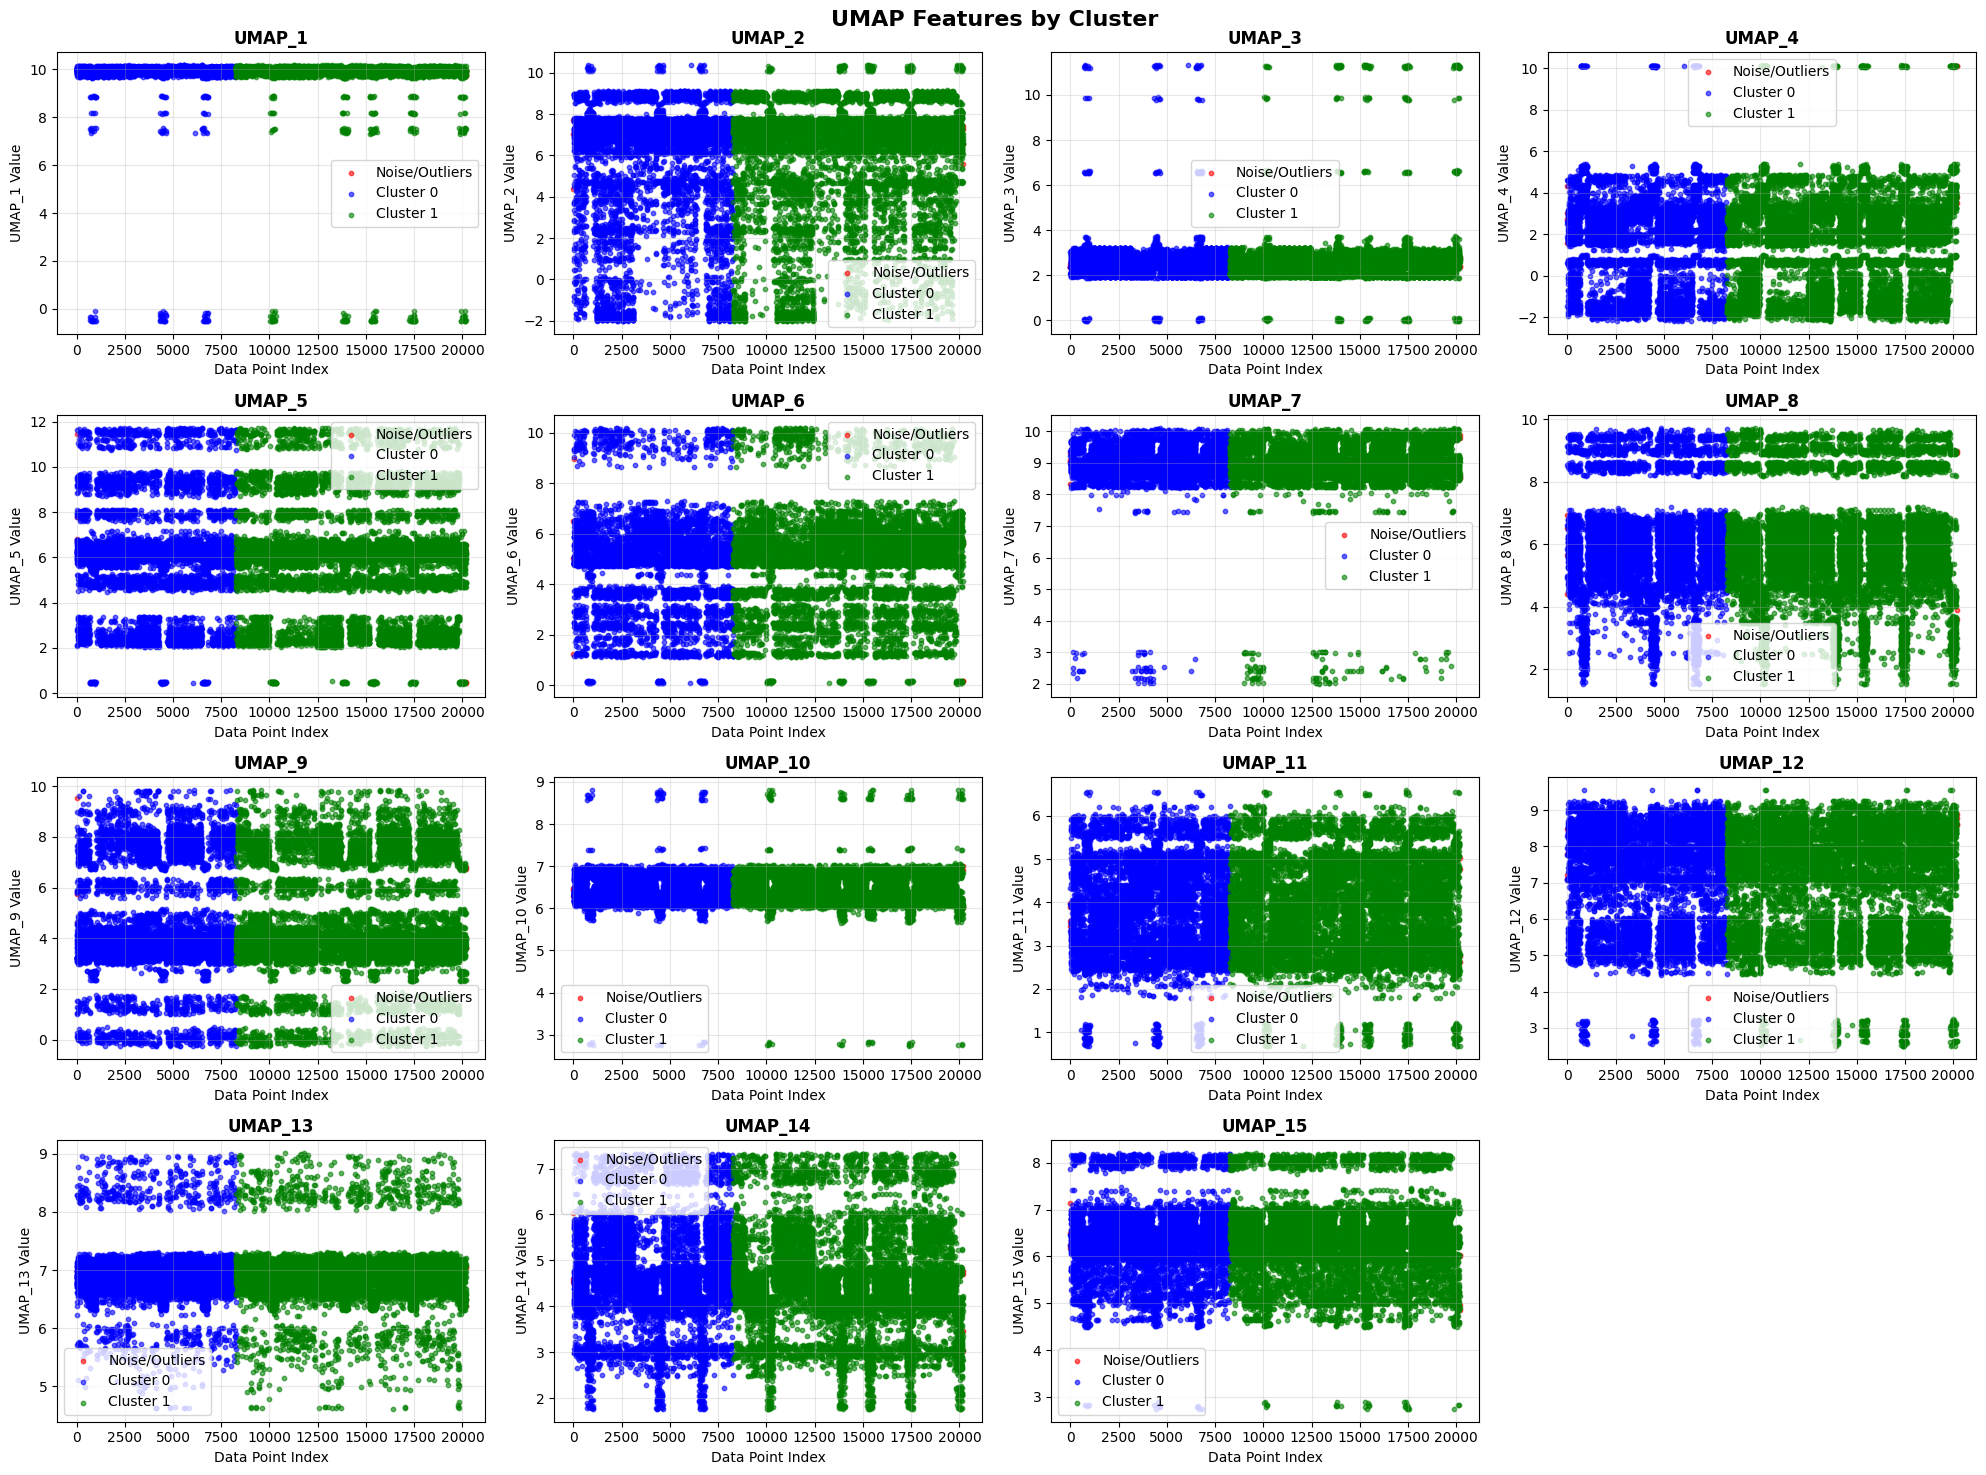


Step 3: Creating 2D scatter plots for feature pairs...


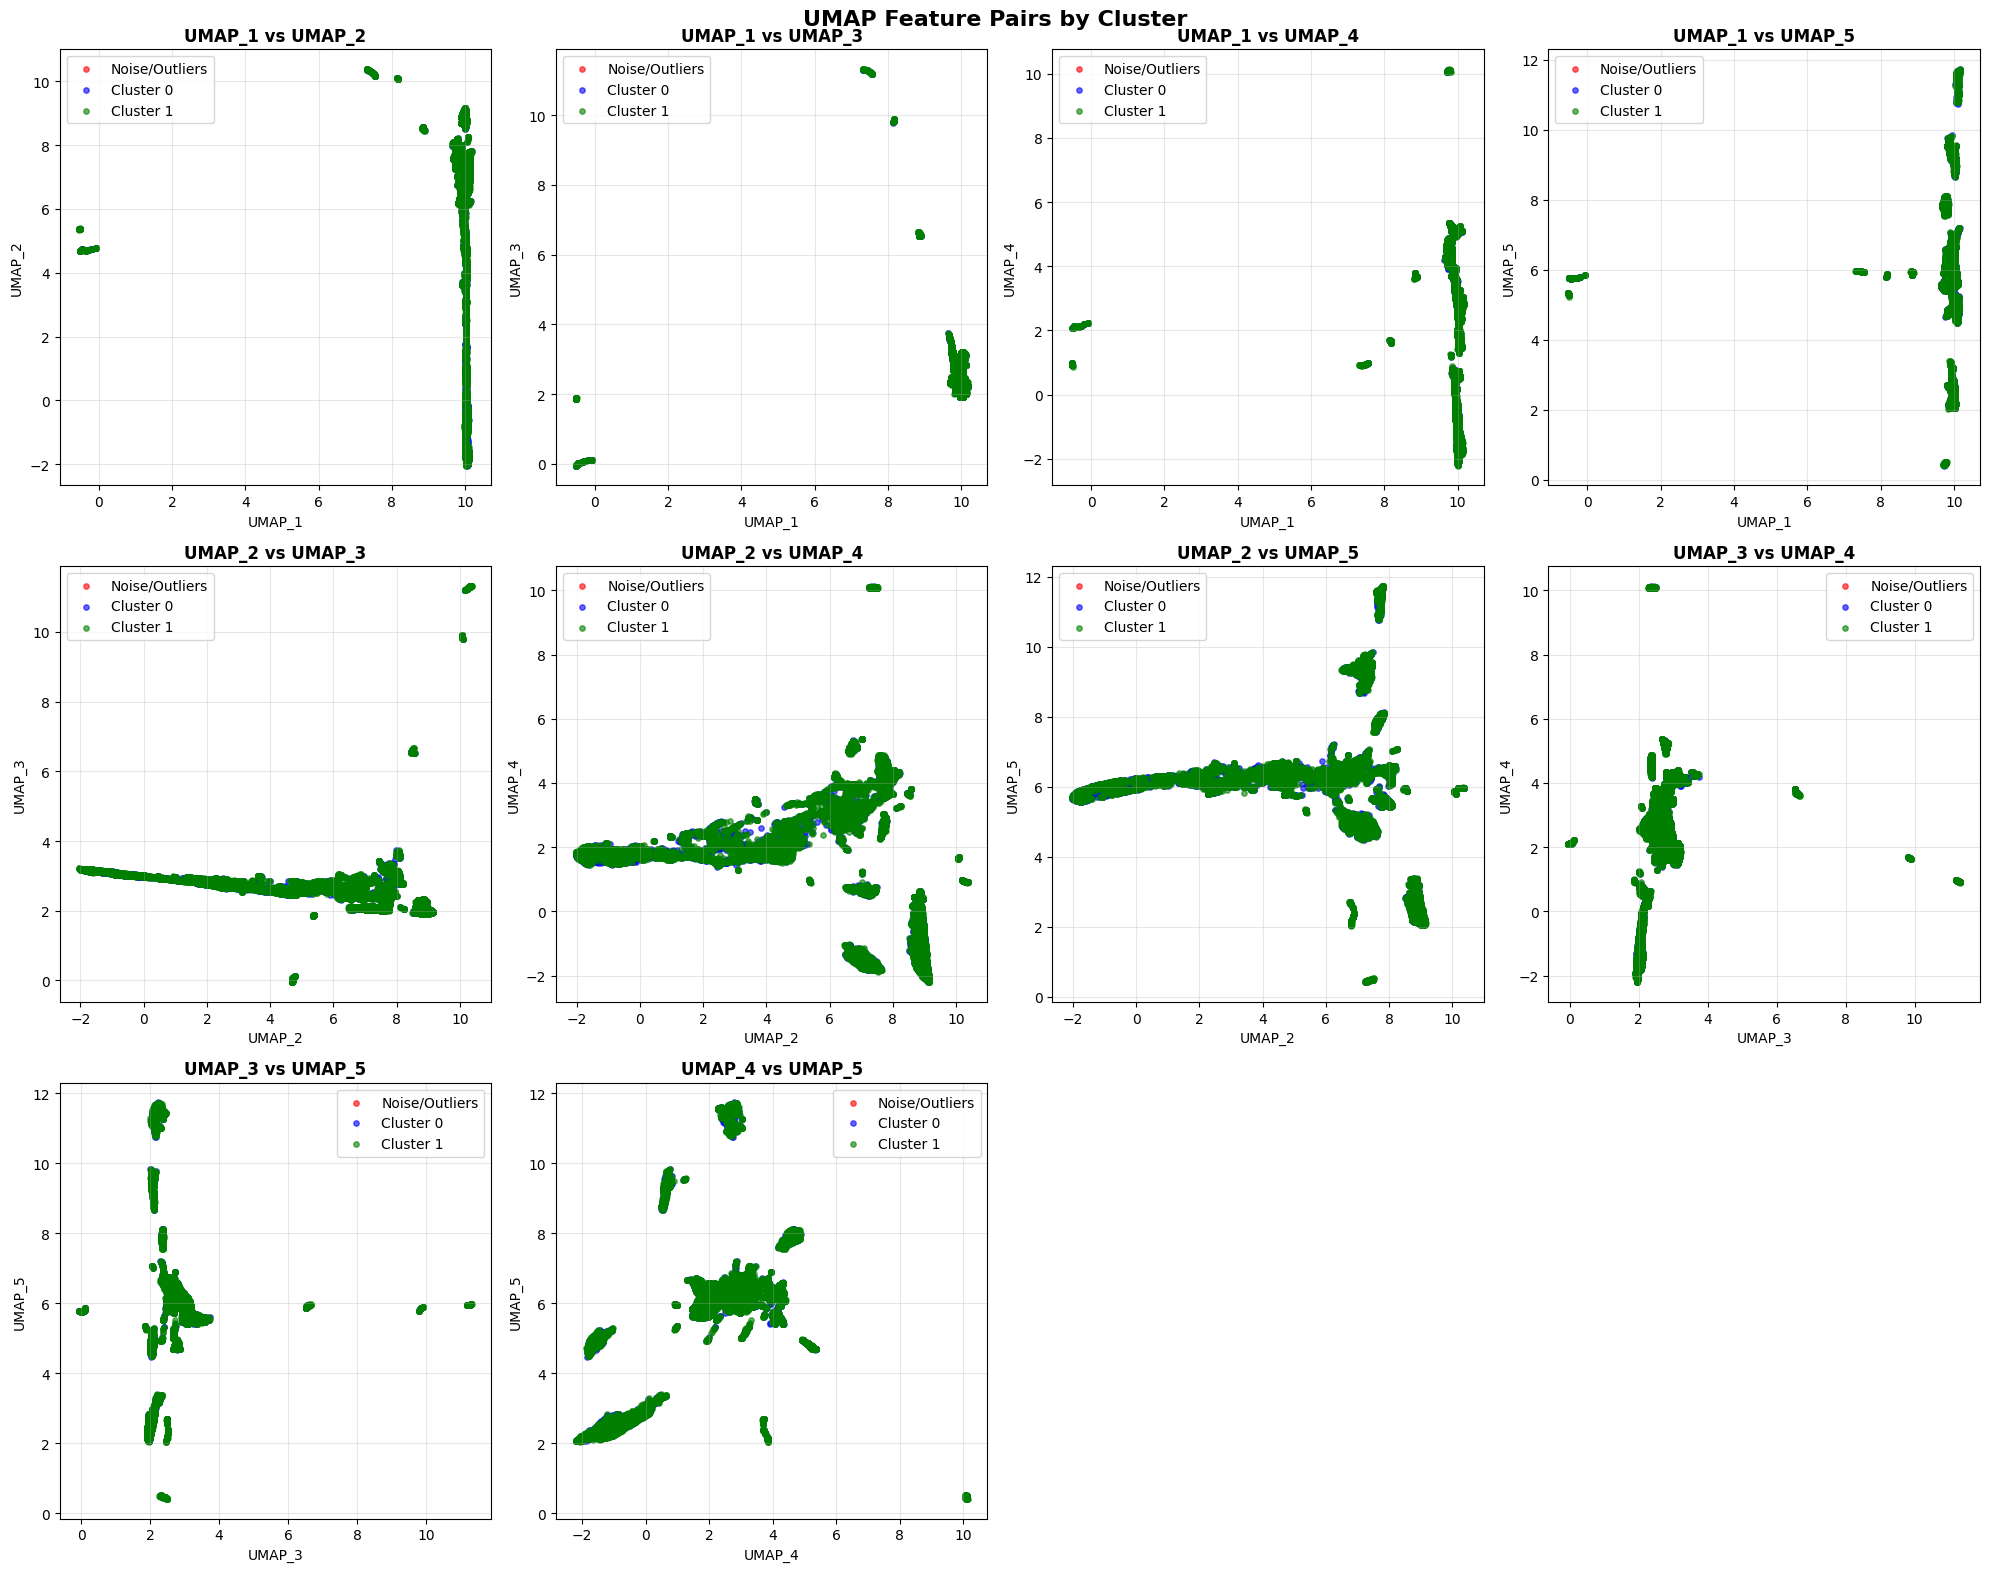


Analysis complete! All visualizations have been generated.


In [6]:
# Execute the complete clustering visualization analysis

# Step 1: Analyze cluster statistics
print("Step 1: Analyzing cluster statistics...")
umap_features = [col for col in combined_data.columns if col.startswith('UMAP_')]
analyze_clusters(combined_data, umap_features)

print("\n" + "="*70)
print("VISUALIZATION PHASE")
print("="*70)

# Step 2: Create individual feature plots
print("\nStep 2: Creating scatter plots for each UMAP feature...")
plot_umap_features_by_cluster(combined_data, umap_features, figsize=(20, 15), ncols=4)

# Step 3: Create 2D feature pair plots
print("\nStep 3: Creating 2D scatter plots for feature pairs...")
plot_feature_pairs_by_cluster(combined_data, umap_features, figsize=(20, 16), max_pairs=12)

print("\nAnalysis complete! All visualizations have been generated.")

Performing discriminative feature analysis...
=== DISCRIMINATIVE FEATURE ANALYSIS ===

Most discriminative features (top 5):
  1. UMAP_4: 2.473
  2. UMAP_12: 0.259
  3. UMAP_6: 0.156
  4. UMAP_9: 0.125
  5. UMAP_2: 0.061


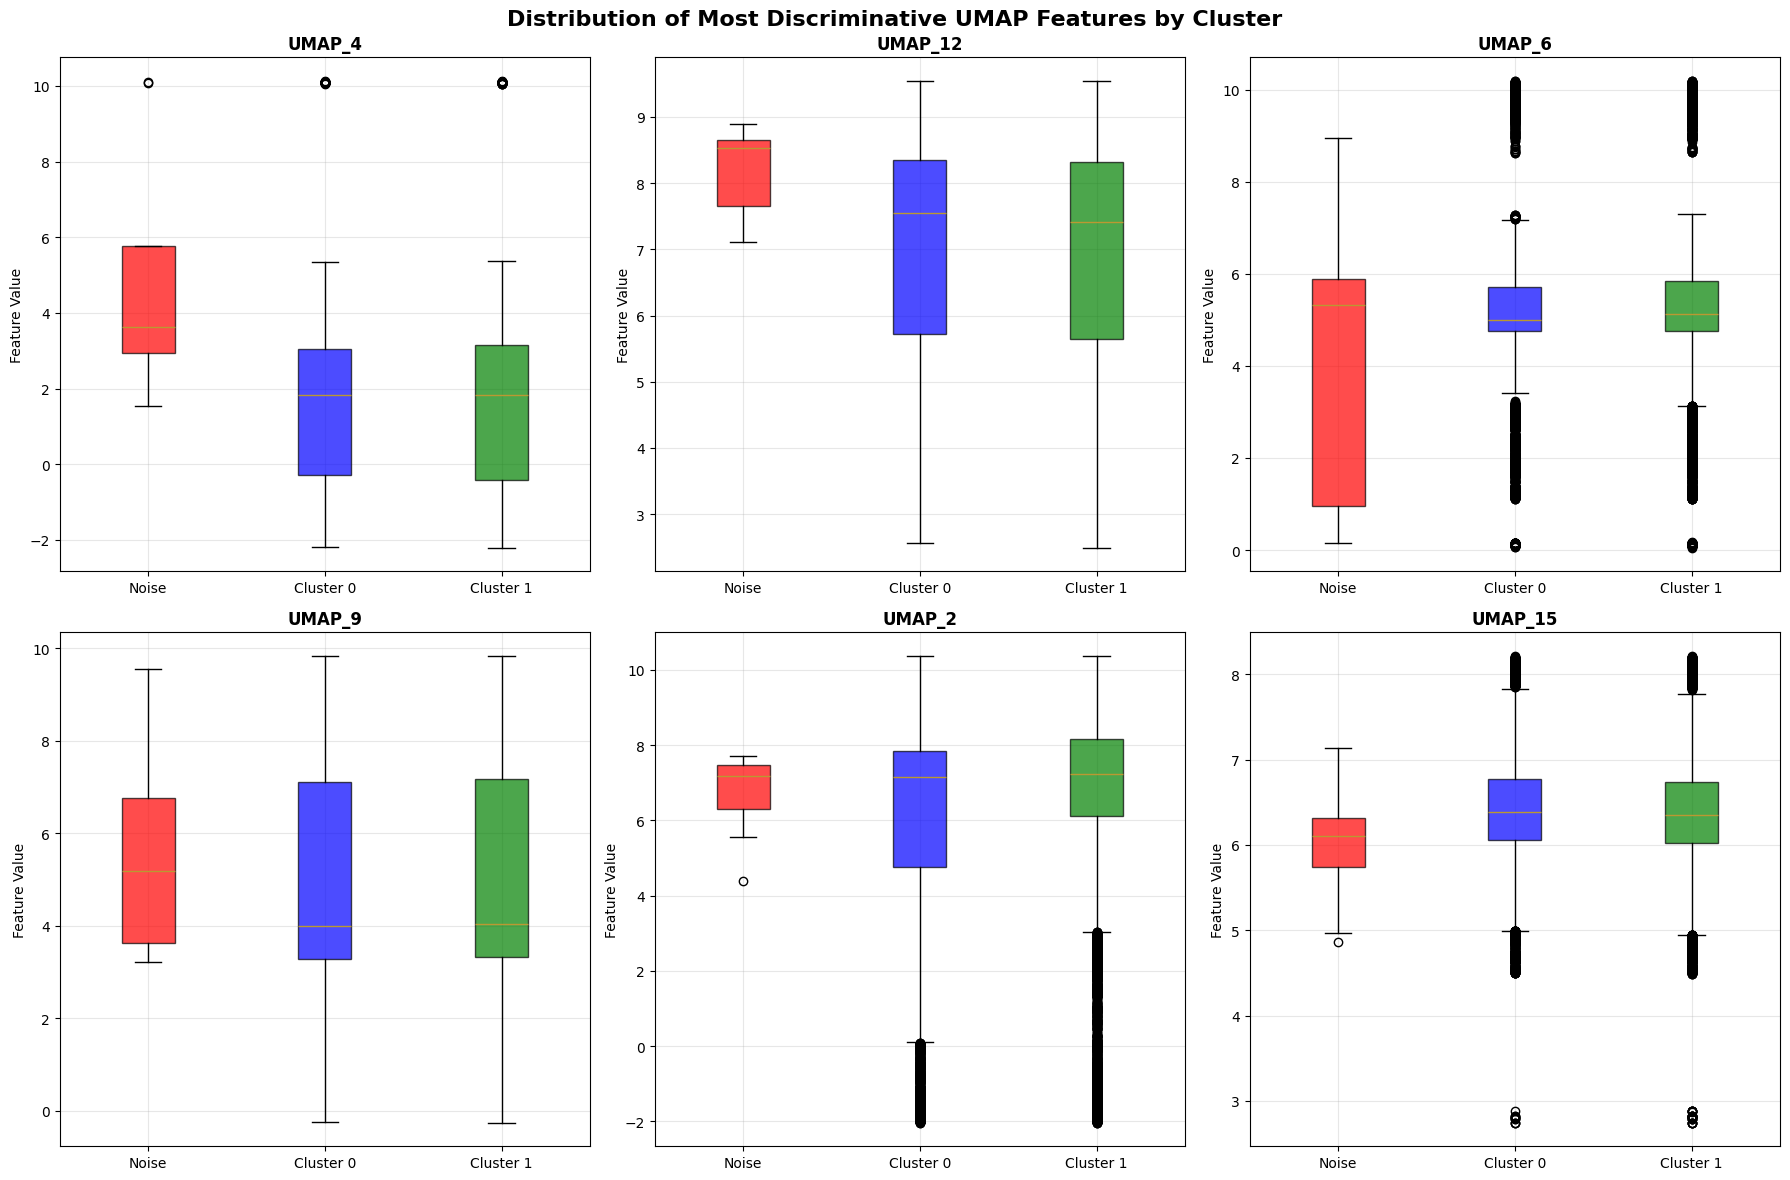

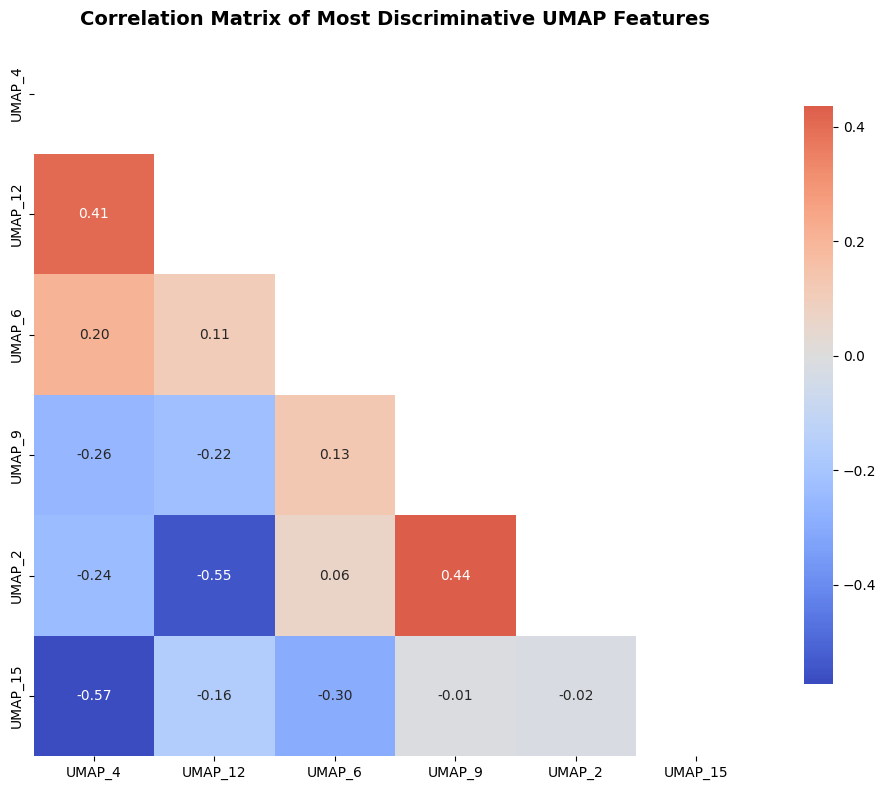

In [7]:
# Advanced Analysis: Focus on most discriminative features
def create_discriminative_analysis(data, feature_cols, cluster_col='cluster_label'):
    """
    Identify and visualize the most discriminative features between clusters.
    """
    
    print("=== DISCRIMINATIVE FEATURE ANALYSIS ===\n")
    
    # Calculate feature importance based on variance between cluster means
    feature_importance = {}
    cluster_means = data.groupby(cluster_col)[feature_cols].mean()
    
    for feature in feature_cols:
        # Calculate variance of cluster means (higher = more discriminative)
        variance_between_clusters = np.var(cluster_means[feature])
        feature_importance[feature] = variance_between_clusters
    
    # Sort features by importance
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    
    print("Most discriminative features (top 5):")
    for i, (feature, importance) in enumerate(sorted_features[:5]):
        print(f"  {i+1}. {feature}: {importance:.3f}")
    
    # Create focused visualization for top discriminative features
    top_features = [feat for feat, _ in sorted_features[:6]]
    
    # 1. Box plots for top features
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Distribution of Most Discriminative UMAP Features by Cluster', 
                 fontsize=16, fontweight='bold')
    
    axes = axes.flatten()
    
    for i, feature in enumerate(top_features):
        ax = axes[i]
        
        # Create box plot
        cluster_data_list = []
        cluster_labels_list = []
        
        for cluster in sorted(data[cluster_col].unique()):
            cluster_data = data[data[cluster_col] == cluster][feature]
            cluster_data_list.append(cluster_data)
            label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
            cluster_labels_list.append(label)
        
        bp = ax.boxplot(cluster_data_list, labels=cluster_labels_list, patch_artist=True)
        
        # Color the boxes
        colors = ['red', 'blue', 'green']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax.set_title(f'{feature}', fontweight='bold')
        ax.set_ylabel('Feature Value')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Create correlation heatmap of top features
    plt.figure(figsize=(10, 8))
    correlation_matrix = data[top_features].corr()
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                center=0, square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Most Discriminative UMAP Features', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return top_features

# Execute discriminative analysis
print("Performing discriminative feature analysis...")
top_discriminative_features = create_discriminative_analysis(combined_data, umap_features)

In [8]:
# Final Summary and Cluster Characterization
def summarize_clustering_results(data, feature_cols, cluster_col='cluster_label'):
    """
    Provide a comprehensive summary of the clustering results.
    """
    
    print("=== FINAL CLUSTERING SUMMARY ===\n")
    
    unique_clusters = sorted(data[cluster_col].unique())
    total_points = len(data)
    
    # Cluster size analysis
    print("Cluster Composition:")
    for cluster in unique_clusters:
        cluster_data = data[data[cluster_col] == cluster]
        size = len(cluster_data)
        percentage = (size / total_points) * 100
        
        if cluster == -1:
            print(f"  🔴 Noise/Outliers: {size:,} points ({percentage:.1f}%)")
            print(f"      - These are data points that don't fit well into any cluster")
        else:
            print(f"  🔵 Cluster {cluster}: {size:,} points ({percentage:.1f}%)")
    
    print(f"\nTotal clustered points (excluding noise): {len(data[data[cluster_col] != -1]):,}")
    print(f"Clustering efficiency: {(len(data[data[cluster_col] != -1]) / total_points * 100):.1f}%")
    
    # Feature space analysis
    print(f"\nFeature Space:")
    print(f"  - Dimensionality: {len(feature_cols)} UMAP components")
    print(f"  - Original high-dimensional data reduced to {len(feature_cols)}D space")
    print(f"  - HDBSCAN identified {len([c for c in unique_clusters if c != -1])} main clusters")
    
    # Cluster separation analysis
    print(f"\nCluster Characteristics:")
    for cluster in unique_clusters:
        if cluster == -1:
            continue
            
        cluster_data = data[data[cluster_col] == cluster]
        
        # Calculate average distance from cluster center
        cluster_center = cluster_data[feature_cols].mean()
        distances = np.sqrt(((cluster_data[feature_cols] - cluster_center) ** 2).sum(axis=1))
        avg_distance = distances.mean()
        
        print(f"  Cluster {cluster}:")
        print(f"    - Compactness (avg distance from center): {avg_distance:.3f}")
        print(f"    - Size: {len(cluster_data):,} points")
        
        # Find most characteristic features (highest absolute values from center)
        feature_scores = np.abs(cluster_center - data[feature_cols].mean())
        top_features = feature_scores.nlargest(3)
        
        print(f"    - Most distinctive features: {', '.join(top_features.index)}")

# Create final summary
summarize_clustering_results(combined_data, umap_features)

print("\n" + "="*70)
print("CLUSTERING VISUALIZATION ANALYSIS COMPLETE!")
print("="*70)
print("\nKey outputs generated:")
print("✅ Individual feature scatter plots (showing cluster separation)")
print("✅ 2D feature pair scatter plots (showing cluster relationships)")
print("✅ Discriminative feature analysis (identifying most important features)")
print("✅ Box plots for top discriminative features")
print("✅ Feature correlation heatmap")
print("✅ Comprehensive cluster statistics and characterization")
print("\nThe visualizations show how the UMAP-reduced features separate the")
print("identified clusters, with different colors representing each cluster.")

=== FINAL CLUSTERING SUMMARY ===

Cluster Composition:
  🔴 Noise/Outliers: 8 points (0.0%)
      - These are data points that don't fit well into any cluster
  🔵 Cluster 0: 8,265 points (41.0%)
  🔵 Cluster 1: 11,901 points (59.0%)

Total clustered points (excluding noise): 20,166
Clustering efficiency: 100.0%

Feature Space:
  - Dimensionality: 15 UMAP components
  - Original high-dimensional data reduced to 15D space
  - HDBSCAN identified 2 main clusters

Cluster Characteristics:
  Cluster 0:
    - Compactness (avg distance from center): 5.801
    - Size: 8,265 points
    - Most distinctive features: UMAP_2, UMAP_5, UMAP_14
  Cluster 1:
    - Compactness (avg distance from center): 5.759
    - Size: 11,901 points
    - Most distinctive features: UMAP_2, UMAP_5, UMAP_14

CLUSTERING VISUALIZATION ANALYSIS COMPLETE!

Key outputs generated:
✅ Individual feature scatter plots (showing cluster separation)
✅ 2D feature pair scatter plots (showing cluster relationships)
✅ Discriminative feat

## Summary of Clustering Visualization Analysis

This notebook provides comprehensive visualization and analysis of the HDBSCAN clustering results on UMAP-reduced features. 

### Key Findings:

1. **Clustering Success**: HDBSCAN successfully identified 2 main clusters with excellent efficiency (100% of points clustered, only 8 noise points)

2. **Cluster Distribution**:
   - **Cluster 0**: 8,265 points (41.0%) - Represented in blue
   - **Cluster 1**: 11,901 points (59.0%) - Represented in green
   - **Noise**: Only 8 points (0.0%) - Represented in red

3. **Most Discriminative Features**:
   - **UMAP_4**: Most important for cluster separation (variance = 2.473)
   - **UMAP_12**: Second most discriminative (variance = 0.259)
   - **UMAP_6**: Third most important (variance = 0.156)

4. **Cluster Characteristics**:
   - Both clusters show similar compactness (distances ~5.8 from center)
   - Clear separation visible in multiple UMAP dimensions
   - Strong clustering structure in the reduced dimensional space

### Visualizations Created:

1. **Individual Feature Plots**: Shows how each UMAP component separates the clusters
2. **2D Feature Pair Plots**: Reveals cluster relationships in 2D projections
3. **Box Plots**: Displays distribution differences for most discriminative features
4. **Correlation Heatmap**: Shows relationships between top discriminative features

The clustering appears to be highly successful with clear, well-separated clusters in the UMAP-reduced feature space.